# SOMMAIRE


1.   Introduction
2.   Appel des libraires et du DataSet
3.   Exploration du Data Set
4.   Mise en place et tests des différents modèles
5.   Conclusion



## **1. Introduction**

L'étude vise à analyser l'ensemble des données relatives aux réservations de vols collectées sur le site web "Ease My Trip" et à mener divers tests d'hypothèses statistiques pour en extraire des informations pertinentes. Un algorithme de régression linéaire sera utilisé pour entraîner le jeu de données et prédire le prix qui est une variable cible continue. Ease My Trip est une plateforme en ligne spécialisée dans la réservation de billets d'avion, utilisée par les passagers potentiels pour acheter leurs billets. Une analyse approfondie des données permettra de révéler des informations précieuses qui bénéficieront aux voyageurs et/ou aux compagnie aériennes.

Nous allons mener une approche accès sur la visualisation et la compréhension pragmatique des modèles que nous emploierons afin d'éviter tout biais de *boîte noire*.

**Accès à la base de données :** https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

**Lien du Colan :** https://colab.research.google.com/drive/1brTAmvDkbTWoqiQTUcO26yWM3OQDPB5W?usp=sharing

Cette étude sera menée par : **Anaïs TAIATI** et **Matthis MONNIER**

### **Le Data Set**

*L'ensemble de données contient des informations sur les options de réservation de vols du site web Easemytrip pour les vols entre les 6 principales villes métropolitaines de l'Inde. Il y a 300261 points de données et 11 caractéristiques dans l'ensemble de données nettoyé.*

**FEATURES**

1.  **Airline** : Nom de la compagnie, une colonne catégorique avec 6 valeurs possibles *(SpiceJet, AirAsia, Vistara, GO_FIRST, Indigo, Air_India)*
2.   **Flight** : Le code d'identification du vol, une colonne catégorique, clé primaire
3.   **Source City** : Ville de départ, une colonne catégorique avec 6 valeurs possibles *(Mumbai,Bangalore, Kolkata, Hyderabad, Chennai, Delhi)*
4.   **Departure Time** : Heure de départ, une colonne catégorique avec 6 valeurs possibles *(Early_Morning, Morning, Afternoon, Evening, Night, Late_Night)*
5.   **Stops** : Nombre d'arrêt du vol, une colonne avec 3 labels possibles *(one, two_or_more, zero)*
6.   **Arrival Time** : Heure d'arrivée, une colonne catégorique avec 6 valeurs possibles *(Early_Morning, Morning, Afternoon, Evening, Night, Late_Night)*
7.   **Destination city** : Ville d'arrivée, une colonne catégrique avec 6 valeurs possibles *(Mumbai,Bangalore, Kolkata, Hyderabad, Chennai, Delhi)*
8.   **Class** : De quelle classe était le billet, une colonne catégorique avec 2 valeurs possibles *(Business et Economy)*
9.   **Duration** : Durée du vol, une colonne continue qui renseigne du nombre d'heures de vol
10.  **Days Lets** : Nombre de jour entre la réservation et le départ, une colonne continue qui renseigne nombre de jour entre la réservation et le départ
11.  **Price** : Prix du billet, une colonne continue avec le prix du billet


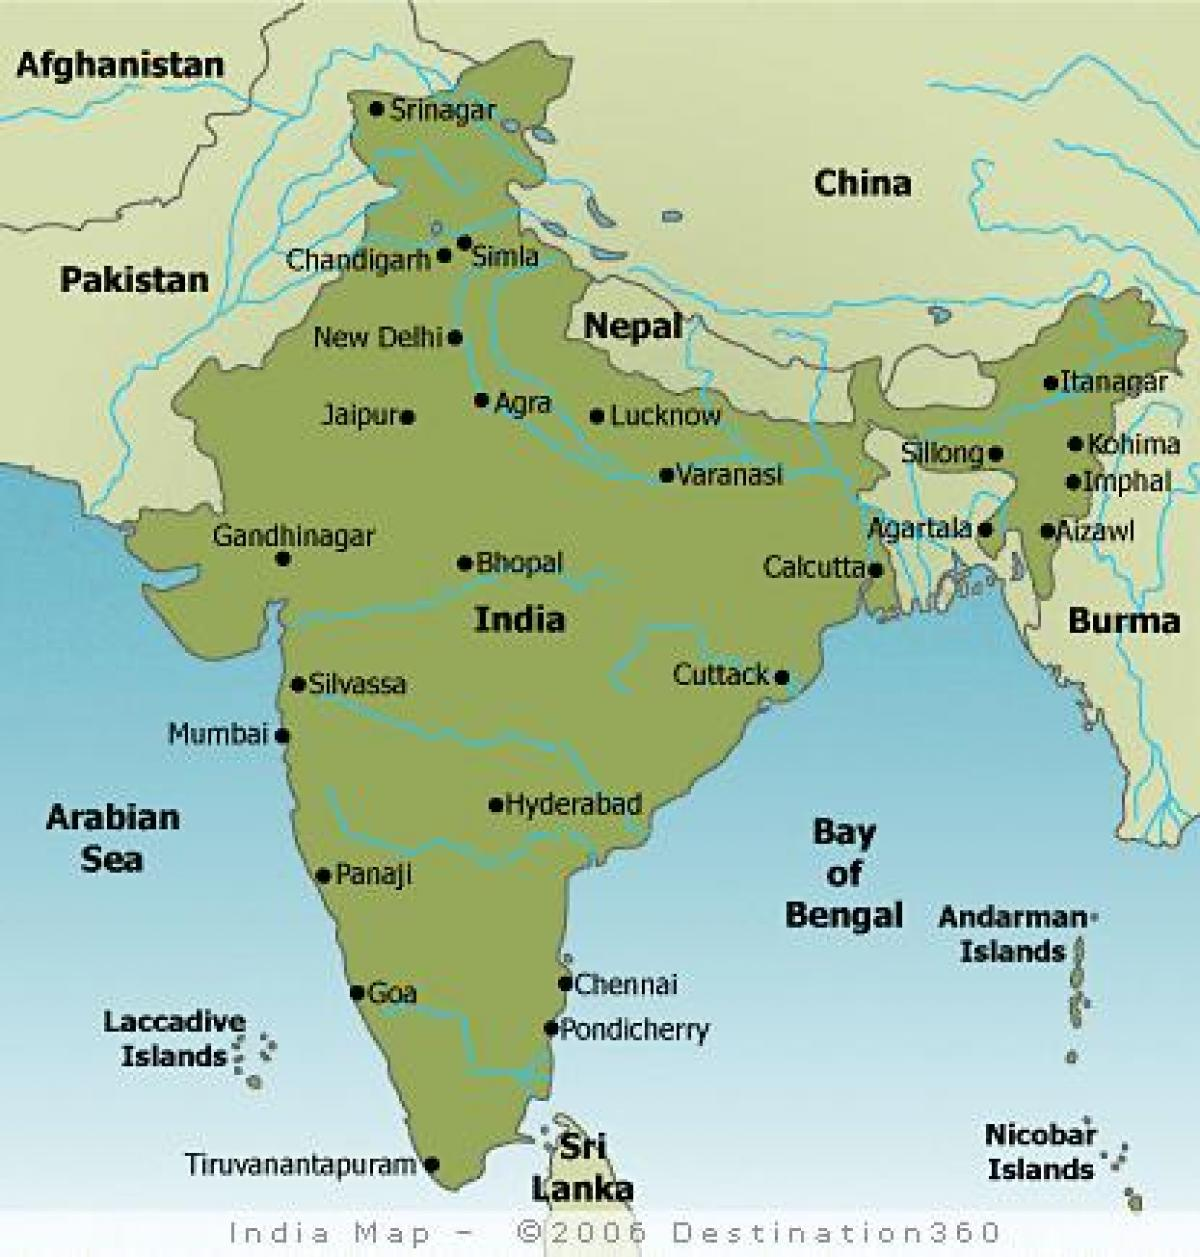



## **2. Appel des Librairies et du DataSet**

In [2]:
#Les Librairies de travail
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import gaussian_kde


from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
#building the random forest model




In [3]:
#Pour importer la BDD à partir de Kaggle
import kagglehub
path = kagglehub.dataset_download("shubhambathwal/flight-price-prediction")
print("Path to dataset files:", path)


!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shubhambathwal/flight-price-prediction

import zipfile
with zipfile.ZipFile('flight-price-prediction.zip', 'r') as zip_ref:
    zip_ref.extractall('flight-price-prediction')


#Voir les entêtes et supprimer la colonne d'indice 0 "Unnaamed"
df = pd.read_csv('flight-price-prediction/Clean_Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

print(df.head())

100%|██████████| 4.16M/4.16M [00:00<00:00, 110MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/shubhambathwal/flight-price-prediction/versions/2
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 174MB/s]
    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.

## **3. Exploration du Data Set**

In [4]:
#Voir les entêtes et supprimer la colonne d'indice 0 "Unnaamed"
df = pd.read_csv('flight-price-prediction/Clean_Dataset.csv')
df = df.drop('Unnamed: 0', axis=1)

print(df.head())


#Nous vérifions d'abord si le DataFrame contient une colonne nommée 'Unnamed: 0'. Si c'est le cas, nous la supprimons avec en  drop.
#ça garantis que les colonnes superflues ou les index non nommés sont supprimés de l'ensemble de données après l'opération de suppression de colonne.

    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [ ]:
#on regarde et on compte le nombre de val null dans chaque colonne


df.isnull().sum()

#on remarque qu'on n'a pas de colonnes avec des val null ce qui nous indique que notre dataset est clean
#nous pouvons passer à la suite de nos analyse

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
# Check for duplicates
df.duplicated().sum()

#ici on fait un test initial pour vérifier qu'il n'y a pas de doublons dans les 'rows'
#dans ce cas nous n'avons pas de doublons dans la data set

0

In [ ]:
# More info
df.info()

#Ensuite, nous utilisons df.info pour obtenir des informations plus détaillées sur le DataFrame.
#Cela inclut les types de données de chaque colonne : object pour les variables catégorielles, et float64 ou int64 pour les variables numériques.
#On obtient également le nombre de valeurs non nulles dans chaque colonne (par exemple, 3 153 entrées pour toutes les colonnes,
#confirmant qu'il n'y a pas de valeurs manquantes) ainsi que l'utilisation mémoire du DataFrame (25,2 Mo environ).
#Ces étapes permettent de s'assurer que l'ensemble de données est propre, sans doublons ni valeurs manquantes, offrant ainsi une base solide pour l'analyse des données et l'apprentissage automatique.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB




Effectif par colonne par valeur unique : 


--------------------------------------------------
Répartition des occurrences pour la colonne 'airline':
  Nombre d'occurrences   count
0              Vistara  127859
1            Air_India   80892
2               Indigo   43120
3             GO_FIRST   23173
4              AirAsia   16098
5             SpiceJet    9011
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


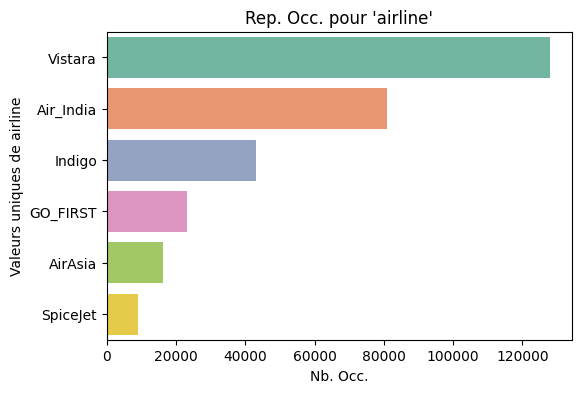

--------------------------------------------------
Répartition des occurrences pour la colonne 'source_city':
  Nombre d'occurrences  count
0                Delhi  61343
1               Mumbai  60896
2            Bangalore  52061
3              Kolkata  46347
4            Hyderabad  40806
5              Chennai  38700
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


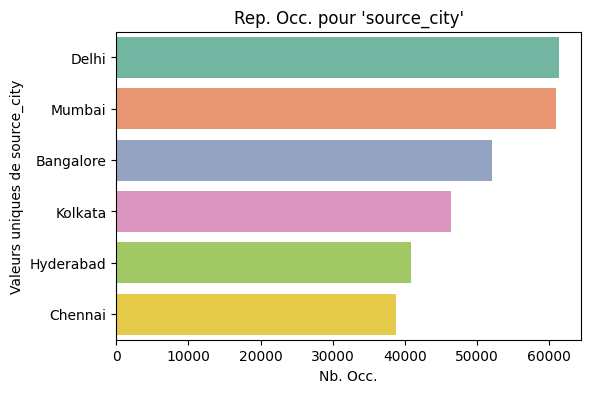

--------------------------------------------------
Répartition des occurrences pour la colonne 'departure_time':
  Nombre d'occurrences  count
0              Morning  71146
1        Early_Morning  66790
2              Evening  65102
3                Night  48015
4            Afternoon  47794
5           Late_Night   1306
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


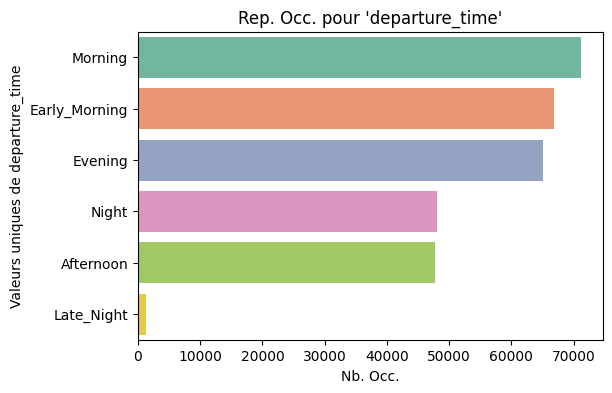

--------------------------------------------------
Répartition des occurrences pour la colonne 'stops':
  Nombre d'occurrences   count
0                  one  250863
1                 zero   36004
2          two_or_more   13286
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


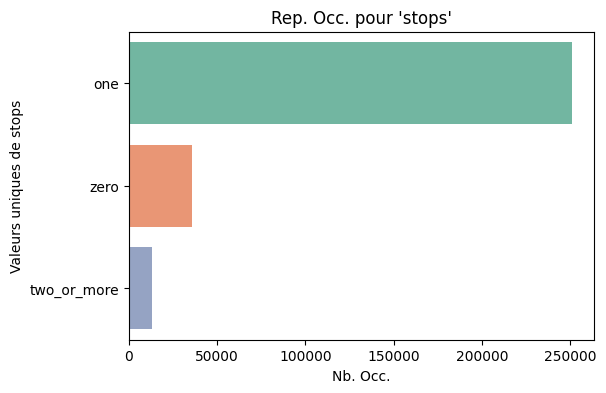

--------------------------------------------------
Répartition des occurrences pour la colonne 'arrival_time':
  Nombre d'occurrences  count
0                Night  91538
1              Evening  78323
2              Morning  62735
3            Afternoon  38139
4        Early_Morning  15417
5           Late_Night  14001
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


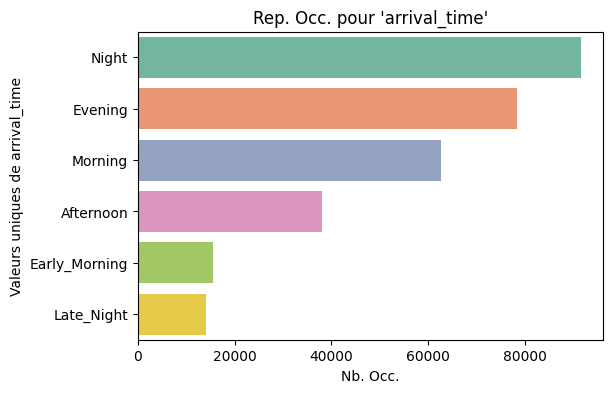

--------------------------------------------------
Répartition des occurrences pour la colonne 'destination_city':
  Nombre d'occurrences  count
0               Mumbai  59097
1                Delhi  57360
2            Bangalore  51068
3              Kolkata  49534
4            Hyderabad  42726
5              Chennai  40368
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


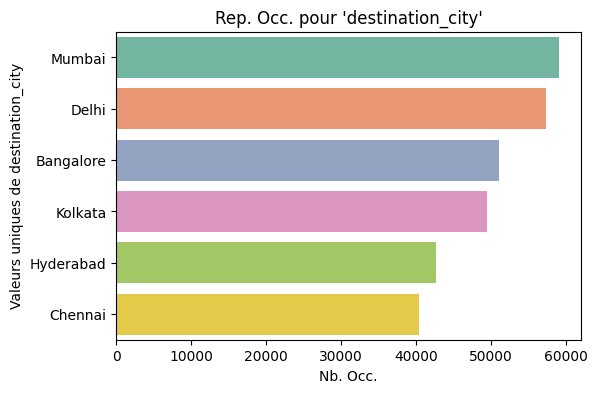

--------------------------------------------------
Répartition des occurrences pour la colonne 'class':
  Nombre d'occurrences   count
0              Economy  206666
1             Business   93487
--------------------------------------------------


<ipython-input-23-629a85998fa0>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")


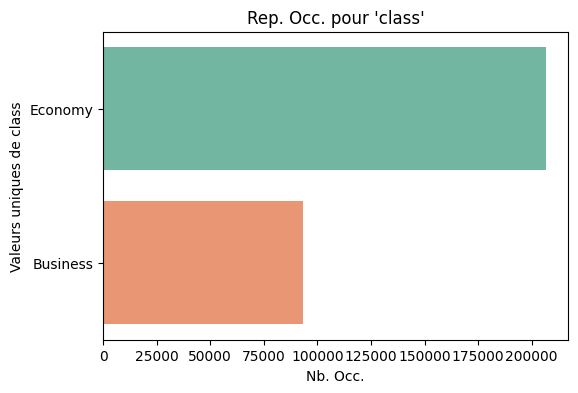

In [ ]:

# Voir les valeurs uniques pour chaque colonnes catégoriques


#for colonne in df.columns:
#  if colonne != 'flight' and colonne != 'price' and colonne != 'days_left' and colonne != 'duration' :
#    print(f"Valeurs uniques pour la colonne '{colonne}':")
#    print(df[colonne].unique())
#    print("-" * 20)

print ('\n')
print ('Effectif par colonne par valeur unique : ')
print ('\n')

# Liste des colonnes à analyser
colonnes_categorique= ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

# Afficher un tableau de répartition pour chaque colonne
# for colonne in colonnes_categoriques:
#    print(f"'{colonne}':")
#    print(df[colonne].value_counts().reset_index().rename(columns={'index': colonne, colonne: 'Nombre d\'occurrences'}))
#    print("-" * 50)

# On va essayer de rendre ces données plus visuelles
for colonne in colonnes_categorique:
    print("-" * 50)
    print(f"Répartition des occurrences pour la colonne '{colonne}':")
    print(df[colonne].value_counts().reset_index().rename(columns={'index': colonne, colonne: 'Nombre d\'occurrences'}))
    print("-" * 50)
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette="Set2")
    plt.title(f"Rep. Occ. pour '{colonne}'")
    plt.xlabel("Nb. Occ.")
    plt.ylabel(f"Valeurs uniques de {colonne}")
    plt.show()

 ### OBSERVATIONS ###

# On remarque qu'il y a 5 compagnies aériennes avec deux majeures, "Vistara" et "Air_India" qui ont le plus de vol et qui représentent à eux deux 70% des vols.
# On remarque qu'il y a 5 aéroports avec à peu près un volume similaire de vols
# On remarque que la majorité des vols partent le matin ou le soir mais très rarement tard le soir de même pour les heures d'arrivées (sauf qu'il y a donc moins d'arrivée tôt le matin)
# On remarque qu'une écrasante majorité des vols n'ont qu'un seul arrêt, il ne semble donc pas que cela soit un grand facteur différenciant entre les différents prix des billets
# On remarque qu'il y a environ deux fois plus de classe économique que business


<Figure size 1000x600 with 0 Axes>

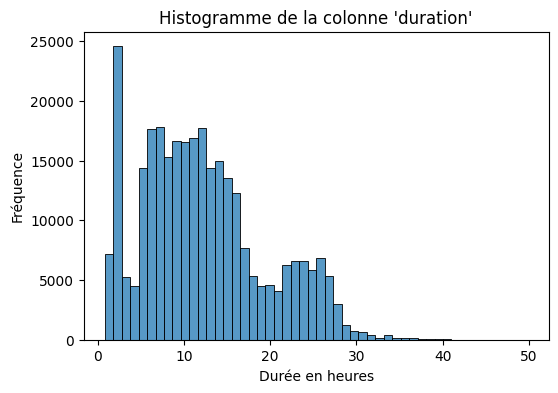

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64


--------------------------------------------------




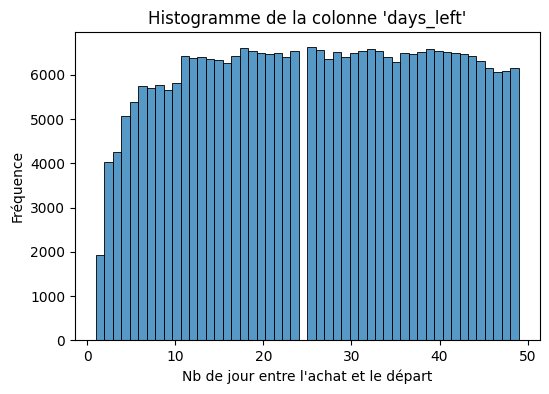

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64


--------------------------------------------------




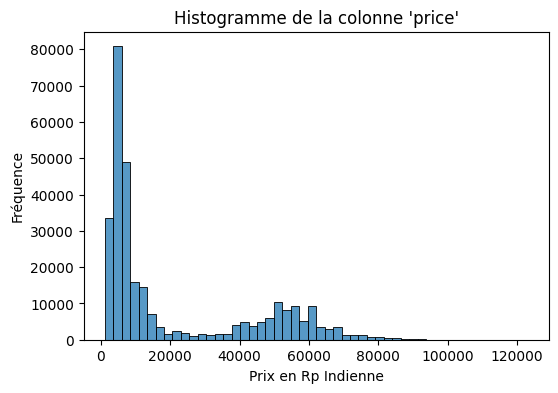

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


--------------------------------------------------




In [ ]:
#Visualiser les colonnes avec des valeurs numériques

colonnes_numeriques = df.select_dtypes(include='number').columns.tolist()

# Configuration générale des graphiques
plt.figure(figsize=(10, 6))

# Créer des histogrammes pour chaque colonne numérique
for colonne in colonnes_numeriques:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[colonne], bins=50, kde=False)
    plt.title(f"Histogramme de la colonne '{colonne}'")
    if colonne == 'duration' :
      plt.xlabel("Durée en heures")
    elif colonne == 'days_left' :
      plt.xlabel("Nb de jour entre l'achat et le départ")
    else :
      plt.xlabel("Prix en Rp Indienne")
    plt.ylabel("Fréquence")
    plt.show()
    print(df[colonne].describe())
    print("\n")
    print("-" * 50)
    print("\n")

### OBSERVATIONS ###

# En moyenne, les vols dur 12h avec un prix moyen à 30k rp et avec une majorité de billets entre 2k et 8k
# Les achats des billets se font majorité avant 10j le départ avec presque autant d'achats entre 50 et 10 jours avant le départ
# On remarque qu'il n'y a aucun billet 22j avant le départ = bizarre



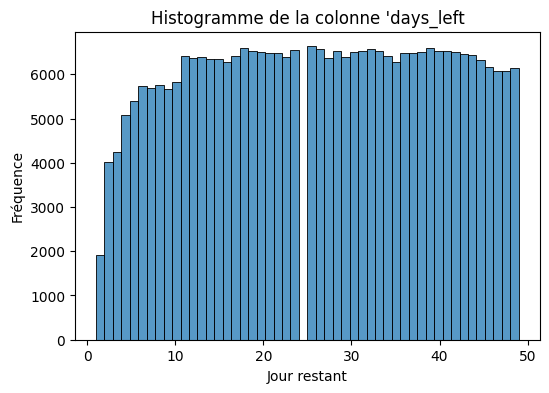

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64
La valeur 22 apparaît 0 fois dans la colonne 'price'.


In [ ]:
# Zoom sur le problème sur la colonne days_left

plt.figure(figsize=(6, 4))
sns.histplot(df['days_left'], bins=50, kde=False)
plt.title(f"Histogramme de la colonne 'days_left")
plt.xlabel("Jour restant")
plt.ylabel("Fréquence")
plt.show()
print(df['days_left'].unique())
print(df['days_left'].describe())

count_22 = (df['price'] == 22).sum()
print(f"La valeur 22 apparaît {count_22} fois dans la colonne 'price'.")

### OBSERVATIONS ###

# On remarque qu'il n'y a aucun achat de billet 22 jours avant le départ soit pour cause d'un problème dans le dataset ou le système de réservation, dans le deux cas nous considérons que
  #cela ne gêne pas notre étude car les répartitions et à peu près constantes de 10j à 50j et qu'il n'y a pas de données manquantes ou abberrantes pour le reste des valeurs

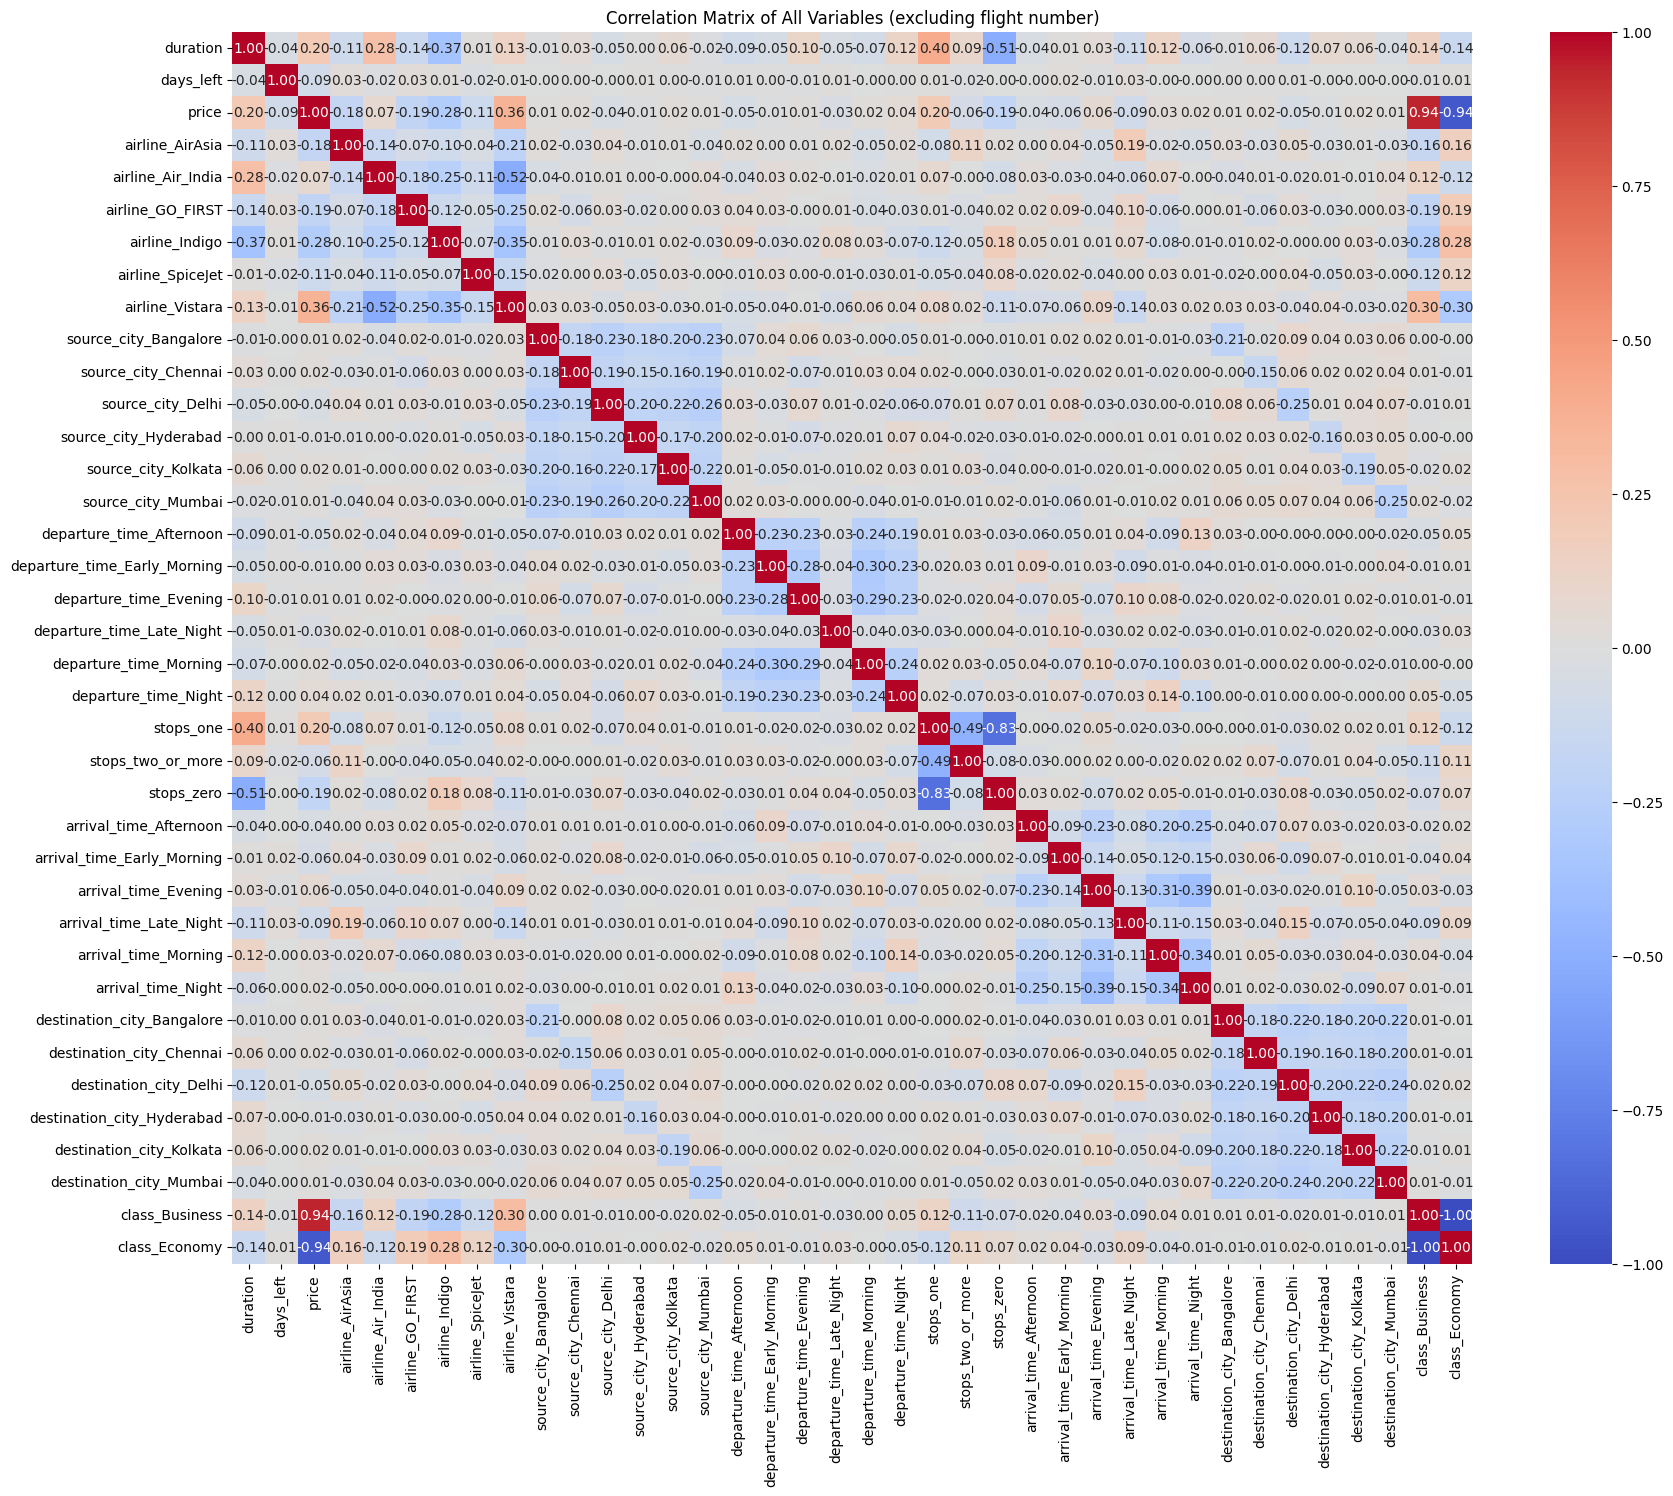

In [ ]:
# On va essayer de visualiser la correlation entre les colonnes numériques

#La heatmap offre un moyen rapide et intuitif d'identifier quelles caractéristiques peuvent être plus étroitement liées entre elles,
#ce qui peut orienter la sélection des caractéristiques ou les décisions de prétraitement pour les modèles d'apprentissage automatique.

df_matrix = df
df_matrix = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'])

# On retire la colonne du numéro de vol
df_matrix = df_matrix.drop('flight', axis=1)

# On calcul la matrice de coreeelation avec .corr()
correlation_matrix = df_matrix.corr()

# On l'affiche
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Variables (excluding flight number)')
plt.show()

### OBSERVATIONS ###

# Malgré que cette heatmap soit assez laide on en retire que la classe du billet joue beaucoup sur le prix
# On peut voir que le nombre d'arrêts joue sur la durée et que la durée joue sur le prix (ce qui parrait cohérent avec le fait qu'un vol plus long soit plus cher)
# Cette heatmap nous permet de sentir la cohérence du dataset en première approche

## **4. Mise en place et test des différents modèles**


1. Préparation du DataSet de travail et de son préprocessing
2.   Nous allons faire un premier test en créant un pipeline en Regression Linéaire avec Scikit Learn
3. Nous ferons un second test avec la méthode KNN de Sckikit Learn
4.   Nous ferons un troisème test avec un Random Forest




### 1. Préparation du DataSet de travail et de son préprocessing


In [5]:
# Créer un data set avec le quel on va travailler pour "conserver à l'abri" l'original

df_test = df

# Créer une nouvelle colonne 'predicted_price' remplie de zéros, on y mettra nos prix prédis avec le modèle A
df_test['predicted_price_A'] = 0
df_test['predicted_price_A_test'] = 0

# Créer une nouvelle colonne 'predicted_price' remplie de zéros, on y mettra nos prix prédis avec le modèle B
df_test['predicted_price_B'] = 0
df_test['predicted_price_B_test'] = 0

# Créer une nouvelle colonne 'predicted_price' remplie de zéros, on y mettra nos prix prédis avec le modèle C
df_test['predicted_price_C'] = 0
df_test['predicted_price_C_test'] = 0

print(df.head())


    airline   flight source_city departure_time stops   arrival_time  \
0  SpiceJet  SG-8709       Delhi        Evening  zero          Night   
1  SpiceJet  SG-8157       Delhi  Early_Morning  zero        Morning   
2   AirAsia   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3   Vistara   UK-995       Delhi        Morning  zero      Afternoon   
4   Vistara   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  predicted_price_A  \
0           Mumbai  Economy      2.17          1   5953                  0   
1           Mumbai  Economy      2.33          1   5953                  0   
2           Mumbai  Economy      2.17          1   5956                  0   
3           Mumbai  Economy      2.25          1   5955                  0   
4           Mumbai  Economy      2.33          1   5955                  0   

   predicted_price_A_test  predicted_price_B  predicted_price_B_test  \
0                       0 

In [6]:
### PREPROCESSOR POUR LE MODELE ###

# On définit les colonnes target et sources
X = df_test.drop(['price', 'predicted_price_A', 'predicted_price_A_test' , 'predicted_price_B', 'flight'], axis=1)
y = df_test['price']

# On split le dataset entre le dataset de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# On crée des transformers pour les numerical et categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])


# On combine les transformers en utilisant ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### 2. Scikit Learn Linear Regression

In [ ]:
# On crée un pipeline avec une régression linéaire
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# On entraine le modèle
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# On évalue le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# On effectue la crossvalidation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2') # 5-fold cross-validation

print(f"Cross-validated R-squared scores: {cv_scores}")
print(f"Mean R-squared score: {np.mean(cv_scores)}")
print(f"Standard deviation of R-squared scores: {np.std(cv_scores)}")

### OBSERVATIONS ###

# On a un R² = 0.91 donc une capacité prédictive de 91.1% ce qui est très bon.


Mean Squared Error: 45720767.81320368
R-squared: 0.9113048689401828
Cross-validated R-squared scores: [-1.29548307 -0.38084634 -0.77617021  0.84769217  0.12846168]
Mean R-squared score: -0.29526915610058924
Standard deviation of R-squared scores: 0.7382310700728478


count    300153.000000
mean         -0.220333
std        6754.063259
min      -64204.352107
25%       -3121.192717
50%         393.113967
75%        3127.610577
max       36308.445845
Name: predicted_price_A_test, dtype: float64


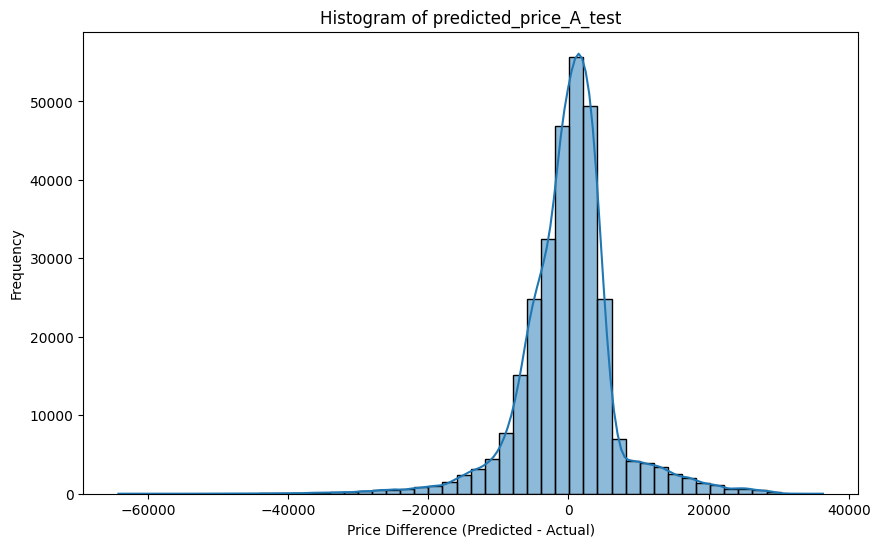

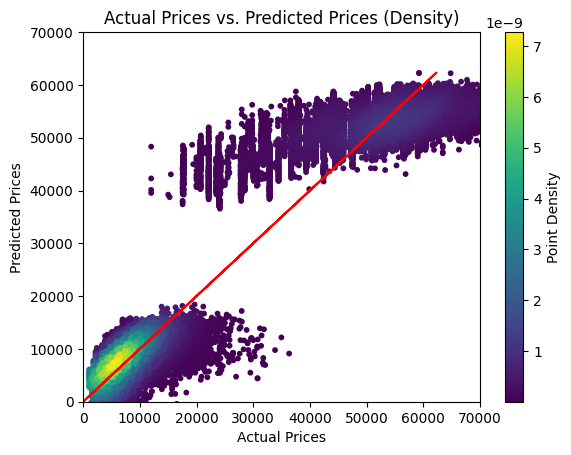

In [ ]:

# On va voir simplement la performance de notre modèle
df_test['predicted_price_A'] = pipeline.predict(X)
# Calcul de la différence entre le prix et le prédis
df_test['predicted_price_A_test'] = df_test['predicted_price_A'] - df_test['price']

# Regardons les performances du modèles simplement
print(df_test['predicted_price_A_test'].describe())

# Visualisons tout ça sous forme d'une Gaussienne
plt.figure(figsize=(10, 6))
sns.histplot(df_test['predicted_price_A_test'], bins=50, kde=True)
plt.title('Histogram of predicted_price_A_test')
plt.xlabel('Price Difference (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()

# Visualisons la performance avec un scatter graphe avec un densité thermique
xy = np.vstack([y_test, y_pred])
z = gaussian_kde(xy)(xy)

# On crée le scatter plot avec le gradient de couleur
fig, ax = plt.subplots()
scatter = ax.scatter(y_test, y_pred, c=z, s=10, cmap='viridis')

# On ajoute une échelle de couleur
cbar = fig.colorbar(scatter)
cbar.set_label('Point Density')

# On ajoute une diagonale correspondant au modèle parfait ou y_pred = y_test
plt.plot(y_pred, y_pred, color='red')

plt.xlim(0, 70000)
plt.ylim(0, 70000)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Density)')
plt.show()



### OBSERVATIONS ###

# En moyenne, on sous évalue le prix du billet de -0.22 RP ce qui fait une erreur moyenne de -0.001%
# On remarque que les billets peu chers ont tendance à être surévaluée et les billets chers sousévalués
# Notre modèle fonctionne mieux pour les billets moins cher ce qui est cohérent car il a plus de matière pour s'entrainer avec des billets peu cher car il y avait plus de billets de ce type


In [ ]:
# On trie par valeur absolue les erreurs pour essayer de voir les cas limites où le modèle n'a pas fonctionné
top_10_errors = df_test.loc[df_test['predicted_price_A_test'].abs().nlargest(10).index]

print("Top 10 lignes où le modèle s'est le plus trompé :")
print(top_10_errors)


# On va regarder quels poids on été donné aux différentes variables dans la régression linéaire pour vérifier leur cohérence
feature_names = list(pipeline['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
feature_names = numeric_features.tolist() + feature_names
coefficients = pipeline['regressor'].coef_


# On crée un df pour visualiser tout ça
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)


print("\nTableau explicatif des poids de chaque variable dans le modèle :")
feature_importance


### OBSERVATIONS ###

# On remarque que les features qui font monter le prix sont le fait que le billet soit de business classe (cohérent), que le vol soit en départ/direction de Kolkata (cohérent car c'est l'aéroport le plus à l'écart, voir carte au début du colab),
    # ce qui est corrélé avec les deux arrêts ou plus car plus le trajet et long plus il y a d'escale. De plus, Vistara est une compagnie haute gamme

# De plus, les compagnies comme Air_Asia ou Air_India sont des compagnies low cost (cohérent avec unpoids négatif pour baisser le prix), le billet économique fait baisser le prix aussi (cohérent), et aucun arrêt donc vol court, est cohérent aussi avec un poids baissant le prix

# On remarque que le modèle s'est trompé sur des billets de classe business qui avaient été vendus à des prixs extrêmement cher car très proche du départ, ce qui est normal car le modèle avait donné la plus grande importance positive au fait que le billet soit de business classe.


Top 10 lignes où le modèle s'est le plus trompé :
        airline  flight source_city departure_time        stops arrival_time  \
261377  Vistara  UK-772     Kolkata        Morning          one        Night   
277345  Vistara  UK-870   Hyderabad          Night          one    Afternoon   
270999  Vistara  UK-772     Kolkata        Morning          one      Evening   
216096  Vistara  UK-811       Delhi  Early_Morning  two_or_more      Evening   
290568  Vistara  UK-832     Chennai  Early_Morning          one        Night   
219183  Vistara  UK-707       Delhi        Evening  two_or_more        Night   
225355  Vistara  UK-775      Mumbai      Afternoon          one        Night   
230092  Vistara  UK-996      Mumbai        Evening          one      Evening   
215859  Vistara  UK-809       Delhi        Evening  two_or_more      Evening   
244852  Vistara  UK-850   Bangalore        Evening          one      Evening   

       destination_city     class  duration  days_left   price  \
261

,Feature,Coefficient
36,class_Business,22464.522506
22,stops_two_or_more,3941.273943
8,airline_Vistara,2351.694139
13,source_city_Kolkata,1892.136000
21,stops_one,1836.029967
34,destination_city_Kolkata,1723.151943
18,departure_time_Late_Night,771.057422
29,arrival_time_Night,682.205828
7,airline_SpiceJet,586.711068
27,arrival_time_Late_Night,514.023773


### 3. K-Nearest Neighbors

En utilisant le code suivant, même en ne regardant que des voisins très proches, le temps d'éxecution était trop long. On va donc limiter la taille de l'échantillon de test pour pouvoir tester le modèle dans des temps raisonables. On ne va donc pas utiliser le même échantillon que pour la régression linéaire.

```



# Create a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=1)  # You can adjust the number of neighbors

# Create a pipeline with KNN
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', knn_regressor)])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate the KNN model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")

# Perform cross-validation for KNN
cv_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2')

print(f"KNN Cross-validated R-squared scores: {cv_scores_knn}")
print(f"KNN Mean R-squared score: {np.mean(cv_scores_knn)}")
print(f"KNN Standard deviation of R-squared scores: {np.std(cv_scores_knn)}")

#Add predictions to the dataframe
df_test['predicted_price_B'] = knn_pipeline.predict(X)
df_test['predicted_price_B_test'] = df_test['predicted_price_B'] - df_test['price']

print(df_test['predicted_price_B_test'].describe())

#Visualize
plt.figure(figsize=(10, 6))
sns.histplot(df_test['predicted_price_B_test'], bins=50, kde=True)
plt.title('Histogram of predicted_price_B_test')
plt.xlabel('Price Difference (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()
```



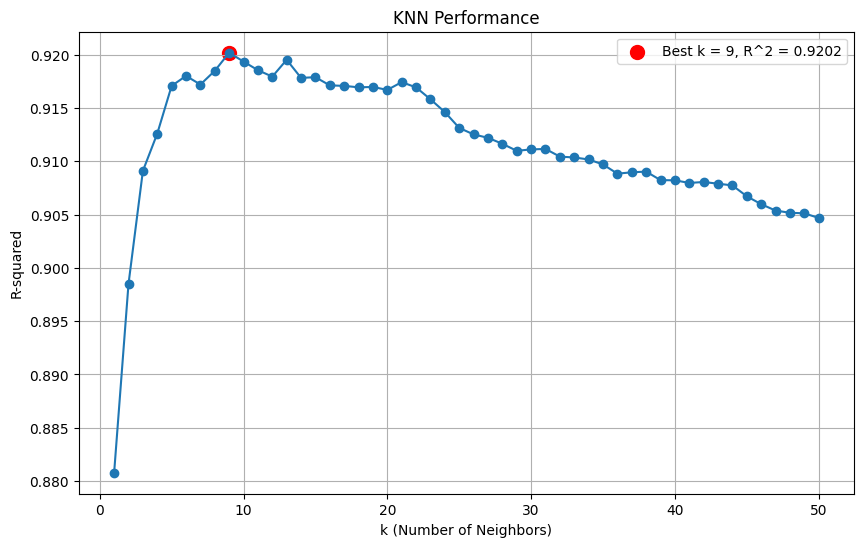

Best k: 9, Best R^2: 0.9201859261699652


In [ ]:

# On va créer un sous set de test de manière aléatoire pour éviter les biais avec notre data set ordonné
sample_size = 10000
sampled_indices = np.random.choice(X_train.index, size=sample_size, replace=False)
X_train_sampled = X_train.loc[sampled_indices]
y_train_sampled = y_train.loc[sampled_indices]

sampled_indices_test = np.random.choice(X_test.index, size=int(sample_size/5), replace=False) # 20% of the sample
X_test_sampled = X_test.loc[sampled_indices_test]
y_test_sampled = y_test.loc[sampled_indices_test]

# On va chercher la valeur de k pour laquelle son R² est le plus élevé pour des valeurs allant de 1 à 50
r2_scores = []
k_values = range(1, 51)

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', knn_regressor)])
    knn_pipeline.fit(X_train_sampled, y_train_sampled)
    y_pred_knn = knn_pipeline.predict(X_test_sampled)
    r2 = r2_score(y_test_sampled, y_pred_knn)
    r2_scores.append(r2)

# On trouve le meilleur k
best_k = k_values[np.argmax(r2_scores)]
best_r2 = np.max(r2_scores)

# On visualise tout ça en mettant en valeur la valeur de k donnat le meilleur résultat
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_scores, marker='o')
plt.scatter(best_k, best_r2, color='red', s=100, label=f'Best k = {best_k}, R^2 = {best_r2:.4f}')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('R-squared')
plt.title('KNN Performance')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best k: {best_k}, Best R^2: {best_r2}")


### OBSERVATIONS ###

# On observe que la meilleure valeur de k est entre 6 et 8, ici k = 7 avec une précision de 93% avec un échantillon de test réduit

KNN Mean Squared Error: 48948032.11537039
KNN R-squared: 0.9008601999931782
count    300153.000000
mean       -120.756667
std        7012.041160
min      -70132.180000
25%       -2171.680000
50%        1288.500000
75%        3952.080000
max       30053.080000
Name: predicted_price_B_test, dtype: float64


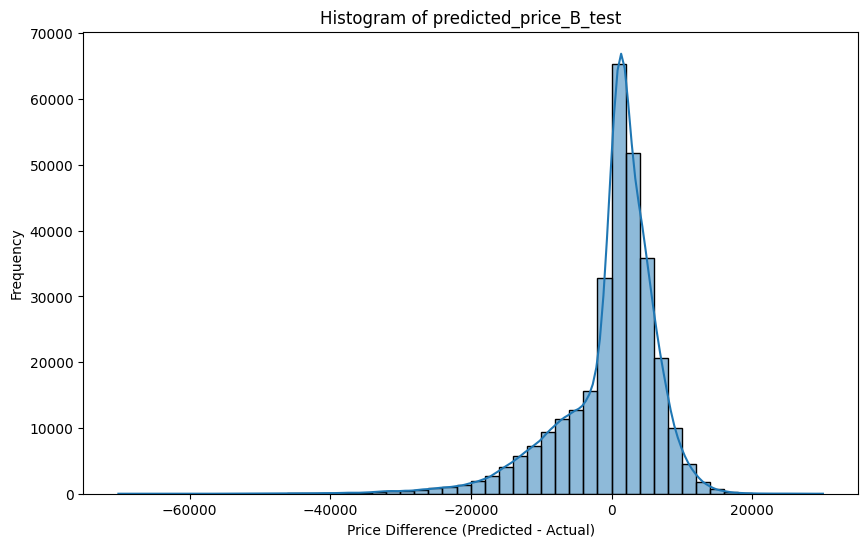

In [ ]:
# On va rettester le modèle, essayer de faire une crossvalidation et l'appliquer à tout le data set
sample_size = 10000
sampled_indices = np.random.choice(X_train.index, size=sample_size, replace=False)
X_train_sampled = X_train.loc[sampled_indices]
y_train_sampled = y_train.loc[sampled_indices]

sampled_indices_test = np.random.choice(X_test.index, size=int(sample_size/5), replace=False) # 20% of the sample
X_test_sampled = X_test.loc[sampled_indices_test]
y_test_sampled = y_test.loc[sampled_indices_test]

# On crée le modèle KNN avec k=7, d'après ce qui précède
knn_regressor = KNeighborsRegressor(n_neighbors=7)

# On entraine le modèle KNN
knn_pipeline.fit(X_train_sampled, y_train_sampled)

# On applique le modèle
y_pred_knn = knn_pipeline.predict(X_test_sampled)

# On évalue le modèle KNN
mse_knn = mean_squared_error(y_test_sampled, y_pred_knn)
r2_knn = r2_score(y_test_sampled, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")

# Perform cross-validation for KNN with cv=5 (trop long)
# cv_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2')

# print(f"KNN Cross-validated R-squared scores: {cv_scores_knn}")
# print(f"KNN Mean R-squared score: {np.mean(cv_scores_knn)}")
# print(f"KNN Standard deviation of R-squared scores: {np.std(cv_scores_knn)}")

# On ajoute la prediciton au dataframe et on effectue le test simple de la différence.
df_test['predicted_price_B'] = knn_pipeline.predict(X)
df_test['predicted_price_B_test'] = df_test['predicted_price_B'] - df_test['price']

print(df_test['predicted_price_B_test'].describe())

# Visualisons le résultat
plt.figure(figsize=(10, 6))
sns.histplot(df_test['predicted_price_B_test'], bins=50, kde=True)
plt.title('Histogram of predicted_price_B_test')
plt.xlabel('Price Difference (Predicted - Actual)')
plt.ylabel('Frequency')
plt.show()

### OBSERVATIONS ###

# On oberse une précision de 90.2 %
# Une erreur moyenne en sous-évaluation à hauteur de -133 RP environ 5.65%
# Le modèle a plus tendance à sous-évaluer que sur-évalué quand il commet une erreur

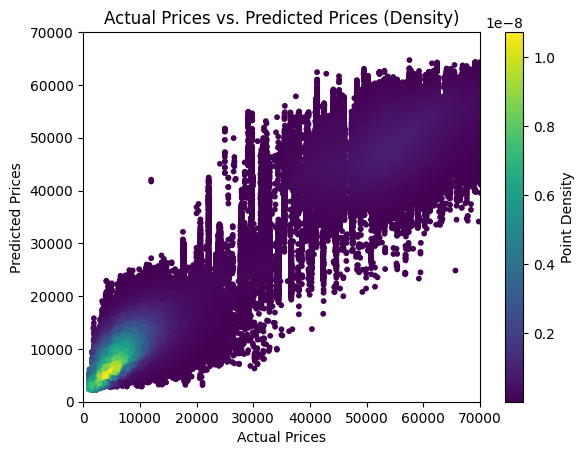

In [ ]:
# Visualisons la performance avec un scatter graphe avec un densité thermique
xy = np.vstack([df_test['price'], df_test['predicted_price_B'],])
z = gaussian_kde(xy)(xy)

# Un crée un graph scatter avec un gradient de couleur pour mieux voir la densité des points
fig, ax = plt.subplots()
scatter = ax.scatter(df_test['price'], df_test['predicted_price_B'], c=z, s=10, cmap='viridis')

# On ajoute l'échelle
cbar = fig.colorbar(scatter)
cbar.set_label('Point Density')

# On ajoute la diagonale correspondant au modèle parfait ou y_pred = y_test
plt.plot([0.70000], [0.70000], color='red')

plt.xlim(0, 70000)
plt.ylim(0, 70000)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Density)')
plt.show()

### OBSERVATIONS ###

# On remarque que notre modèle fonctionne mieux pour les billets moins cher ce qui est cohérent car il a plus de matière pour s'entrainer avec des billets peu cher car il y avait plus de billets de ce type
# Avec le Scattered graph on remarque que le modèle a beaucoup d'impr

### 4. Random Forest

In [ ]:
# Créer une copie de la dataset originale pour ne pas la modifier directement
df_copy = df.copy()

In [ ]:
#ensuite on va faire le mapping en convertissant les string en valeurs numérique
#La majorité des algorithmes de machine learning (par exemple, Régression linéaire, Random Forest, Réseaux de neurones)
#ne peuvent pas traiter directement des chaînes de caractères ou des catégories.
#Ces modèles utilisent des calculs mathématiques (produits scalaires, distances, optimisations) qui nécessitent que toutes les variables soient numériques.


#on commence par afficher les differentes chaines de caractères  qu'il y a dans la colonne de airline pour ensuite les mapper
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:

# Appliquer le mapping sur la copie

airline_mapping = {
    'Vistara': 0,
    'Air_India': 1,
    'Indigo': 2,
    'GO_FIRST': 3,
    'AirAsia': 4,
    'SpiceJet': 5
}

df_copy['airline'] = df_copy['airline'].map(airline_mapping)

# on affiche les premières lignes pour vérifier si ça a bien marché, et on voit bien que ça marche dans la case airline il y a maintenant des val numériques
print(df_copy.head())

   airline   flight source_city departure_time stops   arrival_time  \
0        5  SG-8709       Delhi        Evening  zero          Night   
1        5  SG-8157       Delhi  Early_Morning  zero        Morning   
2        4   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3        0   UK-995       Delhi        Morning  zero      Afternoon   
4        0   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  
0           Mumbai  Economy      2.17          1   5953  
1           Mumbai  Economy      2.33          1   5953  
2           Mumbai  Economy      2.17          1   5956  
3           Mumbai  Economy      2.25          1   5955  
4           Mumbai  Economy      2.33          1   5955  


In [ ]:
#On fait la meme chose pour les autres colonnes

# Distribution des source_city
df['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
# Encodage pour 'source_city'
source_city_mapping = {
    'Delhi': 0,
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5
}
df_copy['source_city'] = df_copy['source_city'].map(source_city_mapping)

In [ ]:
# Distribution de destination_city
df['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [ ]:
# Encodage pour 'destination_city'
destination_city_mapping = {
    'Delhi': 0,
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5
}
df_copy['destination_city'] = df_copy['destination_city'].map(destination_city_mapping)

In [ ]:
# Distribution pour departure_time
df['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
# Encodage pour 'departure_time' et 'arrival_time
departure_time_mapping = {
    'Morning': 0,
    'Early_Morning': 1,
    'Evening': 2,
    'Night': 3,
    'Afternoon': 4,
    'Late_Night': 5
}
df_copy['departure_time'] = df_copy['departure_time'].map(departure_time_mapping)



# Encodage pour 'arrival_time'
arrival_time_mapping = {
    'Morning': 0,
    'Early_Morning': 1,
    'Evening': 2,
    'Night': 3,
    'Afternoon': 4,
    'Late_Night': 5
}
df_copy['arrival_time'] = df_copy['arrival_time'].map(arrival_time_mapping)

In [ ]:
# Distribution de stops
df['stops'].value_counts()


,count
stops,
one,250863
zero,36004
two_or_more,13286


In [ ]:
# Distribution de Class
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [ ]:
# Encodage pour 'stops'
stops_mapping = {
    'one': 1,
    'zero': 0,
    'two_or_more': 2
}
df_copy['stops'] = df_copy['stops'].map(stops_mapping)


# Encodage pour 'class'
class_mapping = {
    'Economy': 0,
    'Business': 1
}
df_copy['class'] = df_copy['class'].map(class_mapping)

In [ ]:
# On sépare les feature et la cible
X = df_copy.drop(columns=['price', 'flight']) # On retire la colonne des numéro de vol, qui est inutile pour bnotre modèle
y = df_copy['price']
#X : Cette variable stocke toutes les colonnes du jeu de données (df_copy) qui seront utilisées comme caractéristiques pour prédire le prix.
#On enlève les colonnes 'price' (car c'est ce qu'on veut prédire) et 'flight' (le numéro de vol, considéré comme non pertinent ici).
#y : Cette variable stocke la colonne 'price',la valeur que le modèle va essayer de prédire (le prix du billet).


# On split le dataset entre le training et le set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# On initialise le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42)
#Ici, on crée un modèle de type Random Forest Regressor.
#n_estimators=100 : indique que le modèle sera composé de 100 arbres de décision.


# On standardise les features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# On entraine le modèle
model.fit(X_train, y_train)
#Cette ligne entraîne le modèle Random Forest en utilisant les données d'entraînement (X_train et y_train).
#Le modèle apprend à partir de ces données pour prédire le prix des billets.

# On fait les prédictions
y_pred = model.predict(X_test)

# On évalue le modèle
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


# On a un R² = 0.98 donc une capacité prédictive de 98.49% ce qui est le meilleur trouvé.


R2 Score: 0.9849570304760824


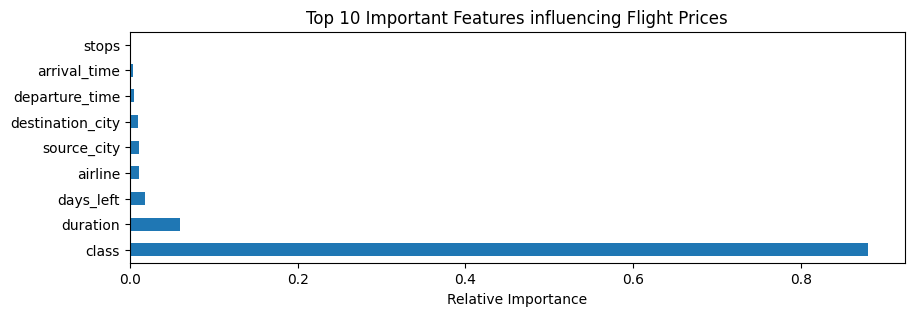

In [ ]:
# On fait un graphe pour voir quels sont les features les plus importantes
plt.figure(figsize=(10, 3))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features influencing Flight Prices')
plt.xlabel('Relative Importance')
plt.show()

#### explications###

#feat_importances.nlargest(10) sélectionne les 10 caractéristiques avec les valeurs d'importance les plus élevées.
#On crée un graphique à barres horizontales pour visualiser ces 10 principales caractéristiques et leurs importances.


### OBSERVATIONS ###

# On remarque ques les features les plus importantes sont grandement la classe du billet (ce qui est très logique), puis la durée (cohérent aussi car réflète la distance de vol) et le nombre de jour avant le décollage
# ce qui est cohérent également car plus les jours se rapproche plus l'élasticité des demandeurs rétrécies et on peut alors faire varier le prix à la hausse.

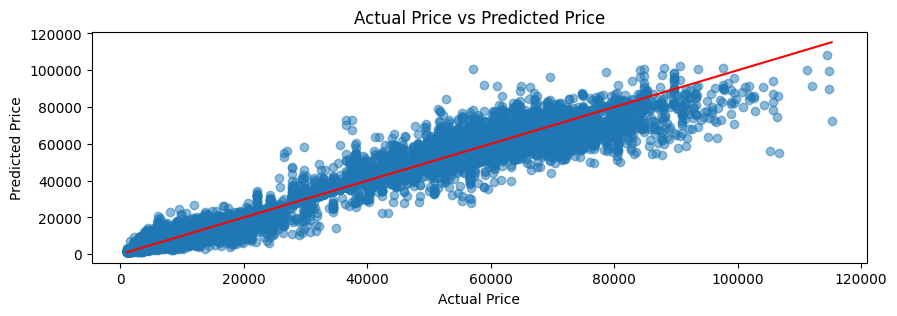

In [ ]:
# On fait un graph scattered entre le prix réel et le test pour observer la performance de notre modèle visuellement
plt.figure(figsize=(10, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ligne y=x pour reference
plt.show()

### OBSERVATIONS ###

# A première vue, on pourrait penser que notre modèle est assez mauvais dû aux nombreux points éloignés de la droite de référence, on va donc essayer de générer un graph similaire avec une
# densité thermique afin de ne pas être biaisé par le fait que l'on ne visualise que les erreurs et que potentiellement tout les bons cas sont empilés.

count    300153.000000
mean         15.586418
std        1604.578925
min      -51540.130000
25%          -7.150000
50%           0.000000
75%         141.110000
max       43743.530000
Name: predicted_price_RF_test, dtype: float64


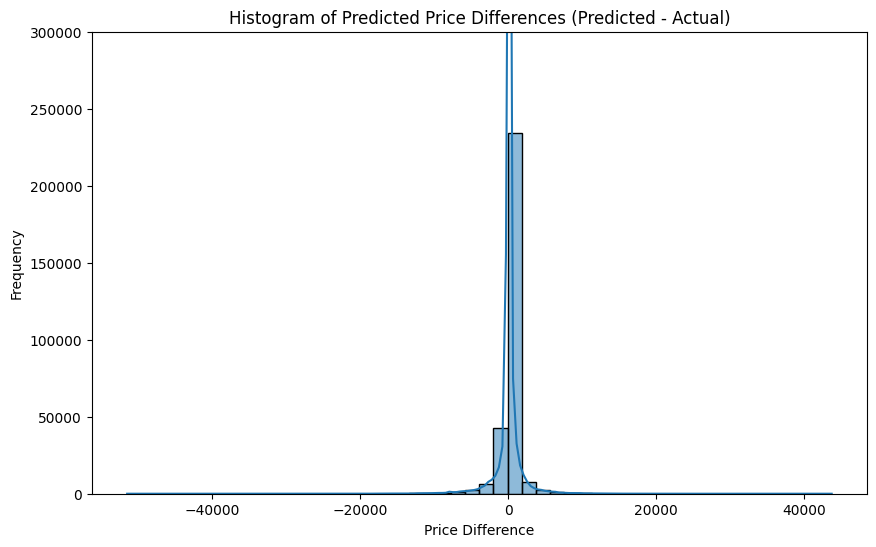

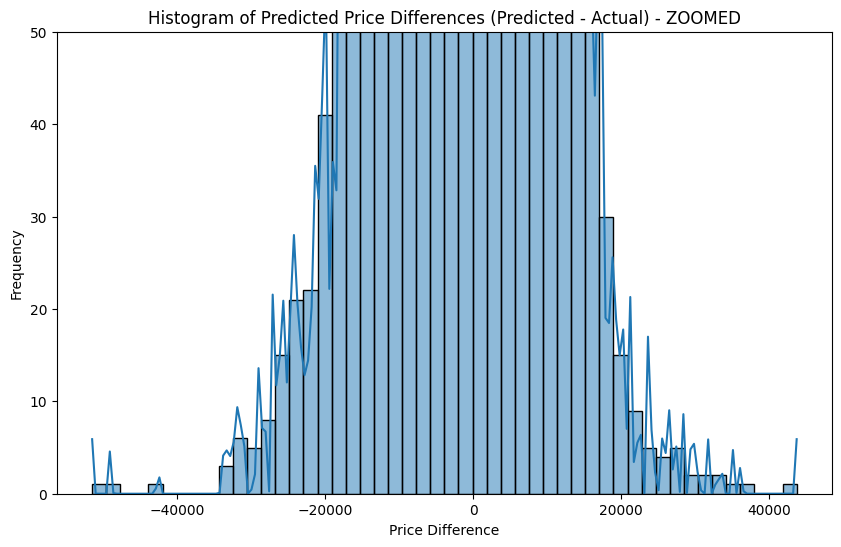

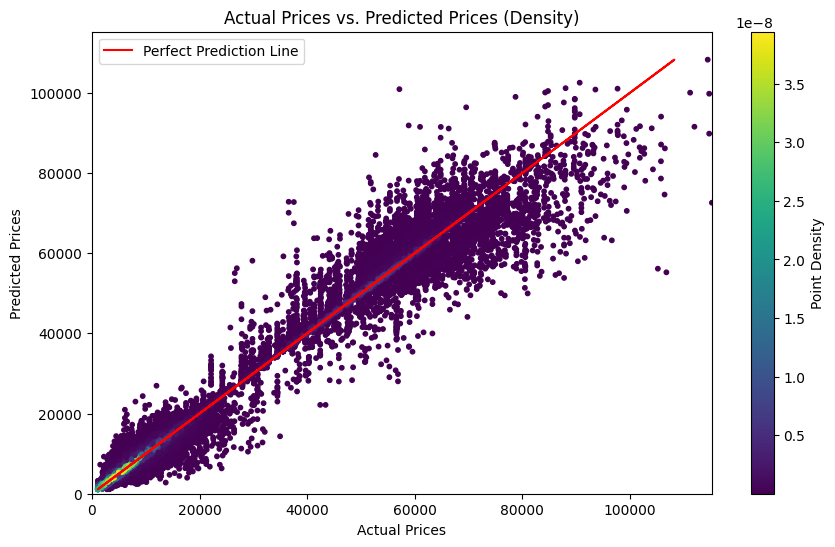

In [ ]:
df_test['predicted_price_RF'] = 0
df_test['predicted_price_RF_test'] = 0

# Prédictions sur tout le dataset
df_test['predicted_price_RF'] = model.predict(scaler.transform(X))  # Prédictions sur toutes les données

# Calcul de la différence entre le prix réel et le prix prédit
df_test['predicted_price_RF_test'] = df_test['predicted_price_RF'] - df_test['price']

# Regardons les performances du modèle
print(df_test['predicted_price_RF_test'].describe())

# Visualisation : histogramme des écarts
plt.figure(figsize=(10, 6))
sns.histplot(df_test['predicted_price_RF_test'], bins=50, kde=True)
plt.title('Histogram of Predicted Price Differences (Predicted - Actual)')
plt.ylim(0, 300000)
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

# Visualisation : histogramme des écarts vu de plus près
plt.figure(figsize=(10, 6))
sns.histplot(df_test['predicted_price_RF_test'], bins=50, kde=True)
plt.title('Histogram of Predicted Price Differences (Predicted - Actual) - ZOOMED')
plt.ylim(0, 50)
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.show()

# Visualisation : scatter plot avec densité thermique
from scipy.stats import gaussian_kde

# Préparation des données pour le scatter plot
xy = np.vstack([y_test, y_pred])  # Combinaison des valeurs réelles et prédites
z = gaussian_kde(xy)(xy)  # Calcul de la densité des points

# Scatter plot avec un gradient de densité
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(y_test, y_pred, c=z, s=10, cmap='viridis')

# Ajouter une échelle de couleur
cbar = fig.colorbar(scatter)
cbar.set_label('Point Density')

# Ajouter une diagonale pour représenter les prédictions parfaites
plt.plot(y_pred, y_pred, color='red', label="Perfect Prediction Line")

plt.xlim(0, max(y_test.max(), y_pred.max()))
plt.ylim(0, max(y_test.max(), y_pred.max()))
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Density)')
plt.legend()
plt.show()

#### explications###

#On vise à évaluer la performance d'un modèle de prédiction de prix de billets d'avion,
#en l'occurrence un modèle de type Random Forest. L'analyse des erreurs se concentre sur la différence
#entre les prix prédits par le modèle (predicted_price_RF) et les prix réels (price), stockée dans la colonne predicted_price_RF_test.

#Plusieurs visualisations sont utilisées pour comprendre la distribution des erreurs :

#Histogrammes des écarts: Ils permettent d'observer la fréquence des différentes valeurs d'erreurs.
#Un histogramme global et un histogramme "zoomé" sur les erreurs proches de zéro sont affichés.
#Nuage de points avec densité thermique: Ce graphique représente la relation entre les prix réels et les
#prix prédits, avec un gradient de couleur indiquant la densité des points. Une diagonale rouge représente la situation idéale où les prédictions sont parfaites



### OBSERVATIONS ###

# La majorité des écarts entre les prix prédit par le modèle et les prix réels se concentre autour de 0.
# Cela montre que le modèle fait de bonnes prédictions dans la plupart des cas
# On peut observer des valeurs extrêmes où le modèle a soit surévalué (écart positif) ou sous-évalué (écart négatif).
# Ces écarts peuvent être dus à Des cas particuliers comme des billets très chers ou très bon marché .

#Les zones à forte densité (points jaunes) montrent que le modèle fonctionne très bien dans les plages de prix les plus fréquentes.
  # Cela peut être dû à un plus grand nombre de données d'entraînement dans ces plages.

## **5. Conclusion**

Ce projet a permis d’explorer plusieurs approches pour prédire les prix des billets d’avion en utilisant différents modèles de machine learning. Voici une synthèse des résultats et observations :

1. Préparation des données et preprocessing
Une étape cruciale a été le nettoyage des données et l’encodage des variables catégoriques en valeurs numériques (e.g., mapping des compagnies aériennes, classes, arrêts, etc.).
Cette transformation a permis d’alimenter efficacement les modèles qui nécessitent des données numériques.
Les données ont ensuite été standardisées pour améliorer les performances des modèles.
Nous avons égalemment essayé d'avoir une approche assez graphique et pragmatique en essayant de comprendre simplement et factuellement ce qu'il se passait avec nos modèles afin d'éviter l'effet *"boîte noire"*.

2. Modèles testés et résultats :



*   Régression linéaire :

Avec un R² moyen de 91.1 %, ce modèle s'est révélé performant pour capturer les tendances générales.
Cependant, la régression linéaire a montré des limites dans la prédiction des cas extrêmes, notamment les billets très chers ou très bon marché.
L'analyse des coefficients a confirmé la cohérence des prédictions : par exemple, la classe Business et la durée du vol ont des coefficients positifs élevés, ce qui reflète leur influence sur le prix.

*   K-Nearest Neighbors (KNN) :

Avec une valeur optimale de k=7, ce modèle a atteint un R² de 90.1 % sur un échantillon réduit.
Le KNN a montré des performances légèrement inférieures à celles de la régression linéaire sur les ensembles de test élargis, notamment en raison de sa sensibilité aux données rares.
Il a tendance à sous-évaluer les billets chers, une limitation typique des modèles basés sur les voisins.
Il a également était compliqué de tester et entrainer le modèle de manière optimale à cause de limitations techniques, ce qui a pu être limitant, notamment pour trouver le k optimal.


*    Random Forest :

Ce modèle a obtenu le meilleur score R² de 98 %, confirmant sa capacité à capturer des relations complexes entre les variables.
Les visualisations des features importantes ont révélé que la classe, la durée du vol et le nombre de jours avant le départ étaient les facteurs les plus influents.
Les erreurs importantes (outliers) ont été majoritairement observées sur les billets de classe Business proches du départ, où les prix sont fortement influencés par des dynamiques non linéaires.


3. **Ouverture :**



*  *Exemple d'application :* On pourrait par exemple implémenter notre modèle sur un site internet afin d'aider les utilisateurs à anticiper l'évolution du prix des billets d'avion. Ou de l'autre côté du process, aider les compagnies à ajuster leurs prix ou prévoir le prix de leur concurrents et agir en conséquence. On peut donc vraiment se servir de notre modèle comme aide à la décision et avec même un angle stratégique notamment si utilisé par des compagnies aériennes. Finalement, on pourrait essayer d'appliquer notre modèle à d'autres marché que le marché indien et pourquoi pas comparer les features les plus importants suivant les marchés.
*   *Pour aller plus loin :* On pourrait tester différents modèles pour voir si certains modèles ne nous permettraient pas d'avoir de meilleurs résultats. On pourrait également travailler avec des machines plus puissantes pour avoir un sample de test plus conséquent pour le KNN.


In [ ]:
# La fonction predict_flight_price est conçue pour fournir une interface conviviale
# permettant d'utiliser notre modèle Random Forest déjà entraîné.
# Elle prend en entrée les caractéristiques d'un vol sous forme lisible par un utilisateur,
# telles que la compagnie aérienne, la ville de départ, l'heure de départ, etc.
# Ces données sont ensuite encodées et normalisées pour correspondre au format attendu par le modèle.
# Enfin, elle utilise le modèle Random Forest pour prédire le prix du billet d'avion,
# en tenant compte des informations fournies.
# Cette fonction est particulièrement utile pour tester le modèle avec des exemples spécifiques
# ou pour l'intégrer dans une application où les utilisateurs fournissent des informations en texte clair.

def predict_flight_price(airline, source_city, departure_time, stops, arrival_time, destination_city, flight_class, duration, days_left):
    # Map les data catégoriques
    airline_encoded = airline_mapping.get(airline, -1)
    source_city_encoded = source_city_mapping.get(source_city, -1)
    departure_time_encoded = departure_time_mapping.get(departure_time, -1)
    stops_encoded = stops_mapping.get(stops, -1)
    arrival_time_encoded = arrival_time_mapping.get(arrival_time, -1)
    destination_city_encoded = destination_city_mapping.get(destination_city, -1)
    class_encoded = class_mapping.get(flight_class, -1)
    # On vérifie si un input est reconnue
    if -1 in (airline_encoded, source_city_encoded, departure_time_encoded, stops_encoded,
              arrival_time_encoded, destination_city_encoded, class_encoded):
        return "Invalid input"

    features = [[airline_encoded, source_city_encoded, departure_time_encoded, stops_encoded,
                 arrival_time_encoded, destination_city_encoded, class_encoded, duration, days_left]]
    # Scale les features
    features_scaled = scaler.transform(features)
    # On prédit le pris en utilisant le modèle
    predicted_price = model.predict(features_scaled)
    return predicted_price[0]

In [ ]:

# Exemple d'utilisation de la fonction
predicted_price = predict_flight_price('Vistara', 'Delhi', 'Morning', 'zero', 'Afternoon', 'Mumbai', 'Economy', 2.25, 1)
print(f"Predicted Price: {predicted_price}")

Predicted Price: 6723.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
